In [13]:
%matplotlib inline
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [15]:
# parameters for the potential
# strength of the interaction

Q = 20#constants.e * 79  # Large nucleus charge
q = 2#constants.e * 2   # Small nuclear charge
m = 2#6.64424e-27       # Small nucleus mass
v0 = 5#1e7              # Initial velocity

k=  q*Q/4*np.pi #Q*q/4*np.pi*constants.epsilon_0 
# range

a = 2
print("apantallamiento a = {0:8.5f}".format(a))

# define integrands.  
# dynamical parameters b and E must be defined before calling them
# integrand for the Yukawa potential
def fY(u):
    return b/np.sqrt(1 - b**2 * u**2 - u*k*np.exp(-1/(u*a))/E)
    
# integrand for the Coulomb potential
def fC(u):
    return b/np.sqrt(1 - b**2 * u**2 - u*k*np.exp(-1/(u0*a))/E)

def df(u):
    return fY(u)-fC(u)
    
# the inverse of the closest approach
def umax(q):
    def f(u):
        return 1 - b**2 * u**2 - u*k*np.exp(-1/(u*a))/E
    return newton(f,q)

apantallamiento a =  2.00000


apantallamiento a =  2.00000
impact parameter  b =  0.30000
collision energy  E =  2.00000
closest approach r0 =  3.19981


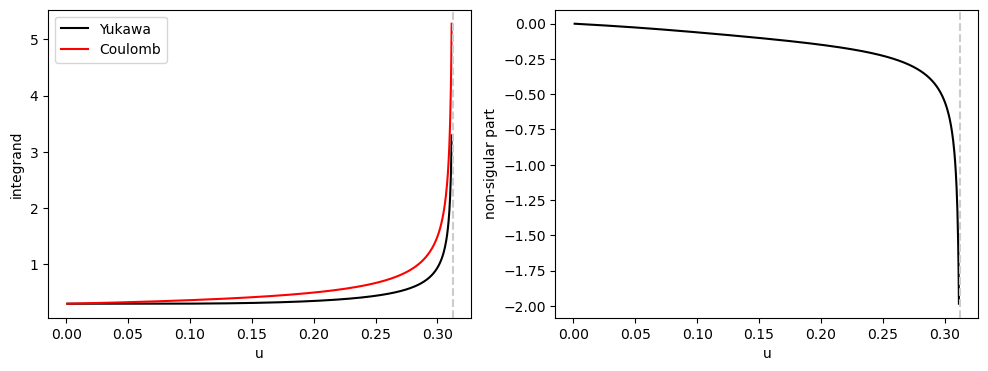

In [3]:
# set impact parameter
b=0.3
print("impact parameter  b = {0:8.5f}".format(b))
# set collision energy
E= 2 #0.5*m*v0**2
print("collision energy  E = {0:8.5f}".format(E))
# find the closest approach
u0=umax(b)
print("closest approach r0 = {0:8.5f}".format(1/u0))

# set number of data points
N = 1000

# set evaluation points (avoid the divide-by-zero error)
u=np.linspace(1e-3,u0-1e-3,N)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.plot(u,fY(u),'-k',label="Yukawa")
plt.plot(u,fC(u),'-r',label="Coulomb")
plt.xlabel("u")
plt.ylabel("integrand")
plt.axvline(x = u0, color = '0.8', linestyle = '--')
#plt.text(1.2,0.5,r"$u_0$")
plt.legend(loc=2)

plt.subplot(1,2,2)
plt.plot(u,fY(u)-fC(u),'-k')
plt.xlabel("u")
plt.ylabel("non-sigular part")
plt.axvline(x = u0, color = '0.8', linestyle = '--')
#plt.text(1.2,-0.05,r"$u_0$")

plt.show()

    Strength of the potential k=31.41593
Decay length of the potential a= 2.00000
             Collision energy E= 2.00000


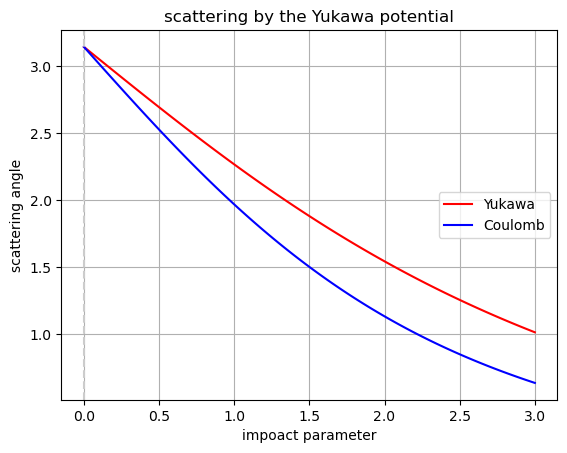

In [17]:
from scipy.integrate import simpson

# set impacto parameters
s=np.linspace(0.0,3.0,101)

# prepare the angle as an array
thetaY=[]
thetaC=[]

# head-on collision (b=0)
thetaY.append(np.pi)
thetaC.append(np.pi)

# for b>0
for i in range(1,101):
    b=s[i]
    u0=umax(b)
    u=np.linspace(0.0,u0,N)

    # avoid divided-by-zero at u=0 and u=u0
    u[0]=0.05
    u[N-1]=u0-0.05
    f=df(u)

    # enter the correct values at u=0 and u=u0
    f[0]=0
    u[0]=0
    f[N-1]=0.0
    u[N-1]=u0

    # evaluate the non-singular part
    dphi=simpson(f,x=u)

    # scattering angle for Coulomb potential
    C=k*np.exp(-1/(a*u0))
    phiC=np.pi/2 - np.arctan(C/(2*b*E))

    # scattering angle of Yukawa potential
    phiY = phiC + dphi

    # get theta from phi
    thetaY.append(np.pi - 2*phiY)
    thetaC.append(np.pi - 2*phiC)
    
print("    Strength of the potential k={0:8.5f}".format(k))
print("Decay length of the potential a={0:8.5f}".format(a))
print("             Collision energy E={0:8.5f}".format(E))

plt.plot(s,thetaY,'-r',label="Yukawa")
plt.plot(s,thetaC,'-b',label="Coulomb")
plt.xlabel("impoact parameter")
plt.ylabel("scattering angle")
plt.axvline(x = 0, color = '0.8', linestyle = '--')
plt.title("scattering by the Yukawa potential")
plt.grid()
plt.legend(loc=5)

# Save the figure as a PNG file
plt.savefig('angle-impact.png', format='png')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import newton

# Define parameters
k = q * Q / (4 * np.pi)  # Potential strength
a = 2                     # Decay length
m = 2                     # Mass
v0 = 5                    # Initial velocity

# Define energy range
E_values = np.linspace(0.1, 10.0, 101)  # Collision energy range

# Prepare the angle arrays
thetaY = []
thetaC = []

# Head-on collision (b=0)
thetaY.append(np.pi)
thetaC.append(np.pi)

# For each energy value
for E in E_values:
    b = 0.3  # Example impact parameter; adjust as necessary
    u0 = umax(b)
    u = np.linspace(0.0, u0, N)

    # Avoid divide-by-zero at u=0 and u=u0
    u[0] = 0.05
    u[N-1] = u0 - 0.05
    f = df(u)

    # Correct values at u=0 and u=u0
    f[0] = 0
    u[0] = 0
    f[N-1] = 0.0
    u[N-1] = u0

    # Evaluate the non-singular part
    dphi = simpson(f, x=u)

    # Scattering angle for Coulomb potential
    C = k * np.exp(-1 / (a * u0))
    phiC = np.pi / 2 - np.arctan(C / (2 * b * E))

    # Scattering angle of Yukawa potential
    phiY = phiC + dphi

    # Get theta from phi
    thetaY.append(np.pi - 2 * phiY)
    thetaC.append(np.pi - 2 * phiC)

# Print relevant parameters
print("    Strength of the potential k={0:8.5f}".format(k))
print("Decay length of the potential a={0:8.5f}".format(a))
print("           impact parameter b a={0:8.5f}".format(b))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(E_values, thetaY[1:], '-r', label="Yukawa")  # Exclude the head-on angle
plt.plot(E_values, thetaC[1:], '-b', label="Coulomb")  # Exclude the head-on angle
plt.xlabel("Collision Energy E")
plt.ylabel("Scattering Angle (θ)")
plt.title("Scattering Angles for Yukawa and Coulomb Potentials vs. Energy")
plt.axvline(x=0, color='0.8', linestyle='--')
plt.legend(loc='best')
plt.grid()
# Save the figure as a PNG file
plt.savefig('angle-energy.png', format='png')

# Show the plot
plt.show()


    Strength of the potential k= 3.18310
             Collision energy E= 2.00000


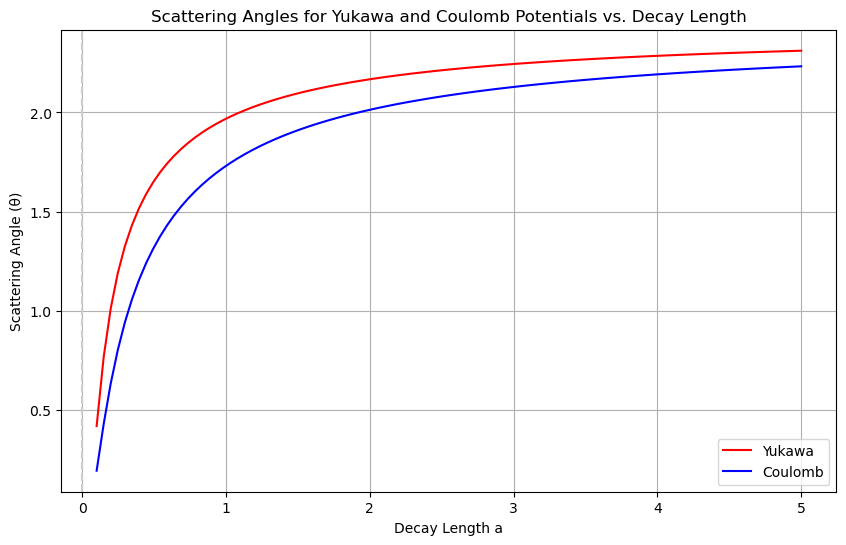

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import newton

# Define parameters
Q = 20  # Large nucleus charge
q = 2   # Small nuclear charge
m = 2   # Small nucleus mass
v0 = 5  # Initial velocity
k = q * Q / (4 * np.pi)  # Potential strength
E = 2  # Collision energy (fixed for this iteration)
N = 1000  # Number of data points for integration

# Define umax function with additional parameters
def umax(b, a, E):
    def f(u):
        return 1 - b**2 * u**2 - u * k * np.exp(-1/(u * a)) / E
    return newton(f, b)  # Start guess can be adjusted

# Define decay length range
a_values = np.linspace(0.1, 5.0, 101)  # Decay length range

# Prepare the angle arrays
thetaY = []
thetaC = []

# Head-on collision (b=0)
thetaY.append(np.pi)
thetaC.append(np.pi)

# For each decay length value
for a in a_values:
    b = 0.3  # Example impact parameter; adjust as necessary
    u0 = umax(b, a, E)  # Call umax with b, a, and E
    u = np.linspace(0.0, u0, N)

    # Avoid divide-by-zero at u=0 and u=u0
    u[0] = 0.05
    u[N-1] = u0 - 0.05
    f = df(u)

    # Correct values at u=0 and u=u0
    f[0] = 0
    u[0] = 0
    f[N-1] = 0.0
    u[N-1] = u0

    # Evaluate the non-singular part
    dphi = simpson(f, x=u)

    # Scattering angle for Coulomb potential
    C = k * np.exp(-1 / (a * u0))
    phiC = np.pi / 2 - np.arctan(C / (2 * b * E))

    # Scattering angle of Yukawa potential
    phiY = phiC + dphi

    # Get theta from phi
    thetaY.append(np.pi - 2 * phiY)
    thetaC.append(np.pi - 2 * phiC)

# Print relevant parameters
print("    Strength of the potential k={0:8.5f}".format(k))
print("             Collision energy E={0:8.5f}".format(E))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(a_values, thetaY[1:], '-r', label="Yukawa")  # Exclude the head-on angle
plt.plot(a_values, thetaC[1:], '-b', label="Coulomb")  # Exclude the head-on angle
plt.xlabel("Decay Length a")
plt.ylabel("Scattering Angle (θ)")
plt.title("Scattering Angles for Yukawa and Coulomb Potentials vs. Decay Length")
plt.axvline(x=0, color='0.8', linestyle='--')
plt.legend(loc='best')
plt.grid()
# Save the figure as a PNG file
plt.savefig('angle-delay.png', format='png')

# Show the plot
plt.show()